In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio_train.csv', delimiter=';')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/cardio_train.csv'

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [ ]:
data['cardio'].value_counts()

1 -> Defective

0 -> Healthy

In [14]:
X = data.drop(columns='cardio', axis=1)
Y = data['cardio']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

NameError: name 'data' is not defined

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [7]:
X_train_scaled_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_scaled_prediction, Y_train)

In [8]:
print("Accuracy on training data :", training_data_accuracy)

Accuracy on training data : 0.720125


In [9]:
X_test_scaled_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_scaled_prediction, Y_test)

In [10]:
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.7207857142857143


Confusion Matrix
[[5356 1648]
 [2261 4735]]


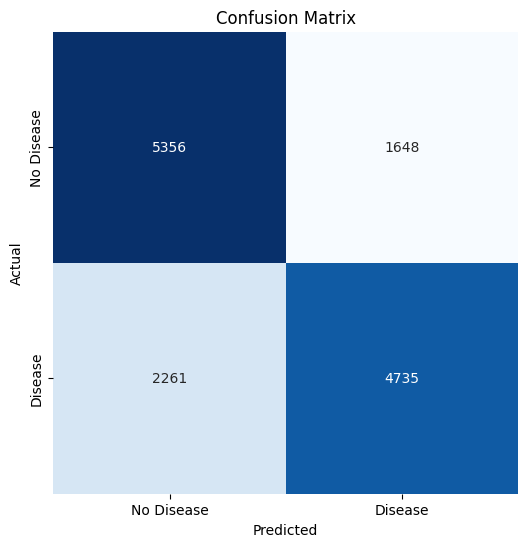

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.70      0.76      0.73      7004
     Disease       0.74      0.68      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [14]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=['No Disease', 'Disease']))

Building Predictive System

In [13]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

input_data = (1, 20228, 1, 156, 85.0, 140, 90, 3, 1, 0, 0, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_scaled = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_scaled)

prediction = model.predict(input_data_scaled)
if prediction[0] == 0:
    print("The person does not have Cardiovascular Disease.")
else:
    print("The person has Cardiovascular Disease.")


The person has Cardiovascular Disease.
